In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error




In [6]:
valid_df = pd.read_csv('./processed_data/validation_set.csv')
valid_df['date'] = pd.to_datetime(valid_df['date'])


with open('./model/magic_number.pkl', 'rb') as f: magic_number = pickle.load(f)
with open('./model/best_model.pkl', 'rb') as f: model = pickle.load(f)



'{"station":2,"zip":95113,"max_temperaturef":81.0,"mean_temperaturef":71.0,"min_temperaturef":61.0,"max_dew_pointf":60.0,"meandew_pointf":58.0,"min_dewpointf":56.0,"max_humidity":84.0,"mean_humidity":65.0,"min_humidity":45.0,"max_sea_level_pressurein":30.03,"mean_sea_level_pressurein":29.98,"min_sea_level_pressurein":29.92,"max_visibilitymiles":10.0,"mean_visibilitymiles":10.0,"min_visibilitymiles":9.0,"max_wind_speedmph":16.0,"mean_wind_speedmph":7.0,"precipitationin":0.0,"cloudcover":2.0,"winddirdegrees":315.0,"is_weekend":true,"is_workingday":false,"events_Fog":false,"events_Fog-Rain":false,"events_Rain":false,"events_Rain-Thunderstorm":false,"events_sunny":true,"last_1_flow":-1.0,"last_2_flow":0.0,"last_4_flow":-2.0,"last_5_flow":7.0,"hour":10,"dow":5,"month":8,"woy":31}'

In [83]:
valid_df['flow_pred'] = valid_df.apply(
    # lambda row: model.predict(row.drop(['date', 'flow']).to_frame().T)[0] - magic_number
    lambda row: model.predict(row.drop(['date', 'flow']).to_frame().T)[0] - magic_number, axis=1
)




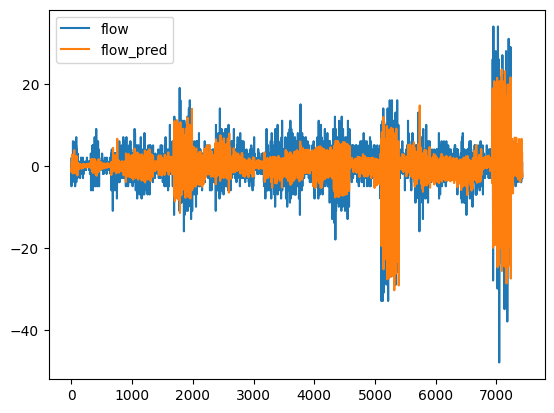

In [88]:
fig, ax = plt.subplots()
valid_df[['flow', 'flow_pred']].plot(ax=ax)
fig.savefig('./results/validation/validatiion_flow_vs_flow_pred.jpg', bbox_inches='tight')


<Axes: >

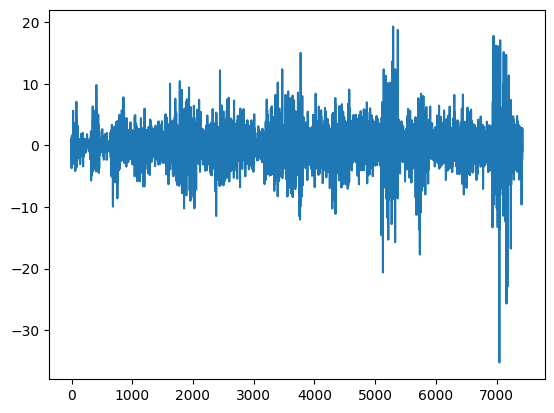

In [85]:
fig, ax = plt.subplots()
(valid_df['flow'] -valid_df['flow_pred']).plot()
fig.savefig('./results/validation/validatiion_mae.jpg', bbox_inches='tight')


In [98]:
mape_corrected = mean_absolute_percentage_error(valid_df['flow'] + magic_number, valid_df['flow_pred'] + magic_number) 
mape = mean_absolute_percentage_error(valid_df['flow'], valid_df['flow_pred']) 
mae =  mean_absolute_error(valid_df['flow'], valid_df['flow_pred'])

print('MAPE', mape)
print('MAPE [corrected]', mape_corrected)
print('MAE', mae)

f = open('./results/validation/validatiion_summary.txt', 'w')
f.write(f'MAPE: {mape_corrected}')
f.write(f'MAPE [corrected]: {mape}')
f.write(f'MAE [corrected]: {mae}')
f.close()


MAPE 855641476739593.0
MAPE [corrected] 0.04068156264809695
MAE 1.6884904389981146
